# Boston House Prices Prediction
- Kaggle 連結: https://www.kaggle.com/vikrishnan/boston-house-prices
    - 供參考用，本次使用 scikit-learn 內裝的 dataset

## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Colab||
|程式執行環境|Colab||
|python 版本|python3|3.7.13|
|安裝環境|pip|21.1.3|

In [486]:
!python --version
!pip --version

Python 3.7.13
pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


## 安裝

請填寫安裝套件需要的指令

```sh
pip install -r requirements.txt
```

## 計算資源

請填寫執行程式所需要的計算資源，請確保所有資源限制在單一個人桌上型電腦且能夠以總市價低於 5 萬的手段取得。

|計算資源|答案|
|-|-|
|使用 CPU 核心數|Colab|
|記憶體需求|Colab|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|無|

## 參考連結

- 有無參考他人之實驗結果：有
- 參考連結：

https://www.kaggle.com/code/peiquin/linear-regression-boston-housing

https://www.kaggle.com/code/sadiqpatel/the-boston-housing-dataset

https://medium.com/li-ting-liao-tiffany/python-%E5%BF%AB%E9%80%9F%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-boston-housing%E6%B3%A2%E5%A3%AB%E9%A0%93%E6%88%BF%E5%83%B9-9c535fb7ceb7

https://www.kaggle.com/code/agleev/boston-r2-score-etr-0-93-gbr-0-91-xdbg-0-89

https://www.kaggle.com/code/ehsandahesh/feature-importance-and-random-forest-model-boston

https://www.kaggle.com/code/gaganmaahi224/boston-acc-88-rfregressor-cleaneda-for-beginners

https://blog.csdn.net/qq_42582489/article/details/106532245
https://www.codetd.com/article/13133817

In [487]:
# 請勿更動此區塊程式碼

import time

EXECUTION_START_TIME = time.time() # 計算執行時間

In [488]:
# 載入必要套件

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pandas as pd

## 載入資料

In [489]:
# 使用 scikit-learn 的資料

dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [490]:
# 觀察資料的 key 值有哪些

dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

## 資料前處理
### TODO #1: 
- 請將資料以 Pandas 整理成 DataFrame 的型式
- 欄位名稱為 feature_names

In [491]:
df = pd.DataFrame(
    # Please put something here.
    dataset.data, columns=dataset.feature_names
)

In [492]:
print("Number of features: ", len(dataset.feature_names))

Number of features:  13


In [493]:
df['MEDV'] = dataset.target

In [494]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### TODO #2: 請進行統計各個 feature 的缺失值數目

由下表可知，並無缺值

In [495]:
# Please use some functions of Pandas here.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [496]:
import seaborn as sns
import matplotlib.pyplot as plt

## 觀察資料的特性

### TODO #3: 利用 Seaborn 畫箱型圖，並進行說明
- 觀察每一個 features 的數值分佈
- 可以用來決定是否要對資料的數值進行標準化

由下圖可看到像是CRIM, ZN, RM, B有一些異常值。

然後RAD跟TAX資料比較分散，可能需要正規化。

而CHAS只有0跟1，與箱型圖的結論符合。

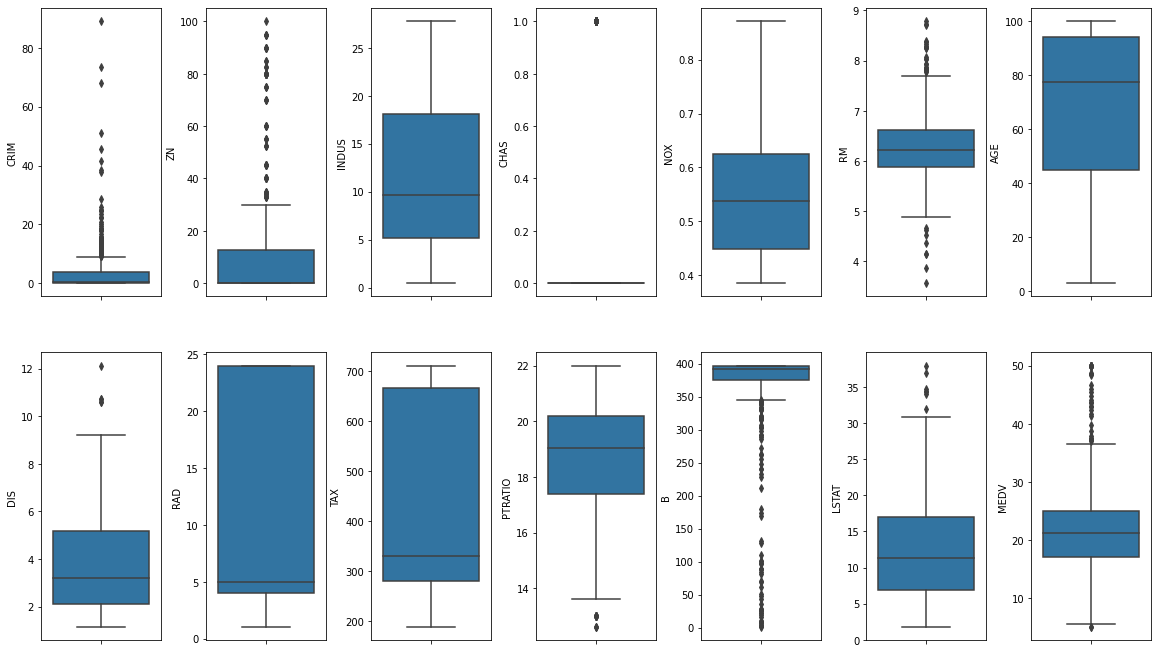

In [497]:
# Plot a boxplot with Seaborn
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(16, 9))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1   

# 繪製圖表ㄒ
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show() 

### TODO #4: 利用 Seaborn 進行 Heatmap 作圖，並進行說明
- 觀察每一個特徵與房價 (MEDV) 的關聯程度
- 使用 dr.corr() 來計算 feature 和 feature 之間的關係係數
- 數值愈高表示愈正相關，數值愈低表示愈負相關

由下圖可以看出來個個數據間的相關係數，越接近1為越為正相關而最接近-1則為越為負相關。

為了避免多重線性關係所影響我們的統計結果，我們需要去找各個feature中，相關性較高的幾個，並考慮將來捨棄相關性高的feature的其中一個。

由圖可看到：

強大正相關：

*   RAD跟TAX
*   NOX跟INDUS

強大負相關：

*   DIS跟NOX
*   AGE跟NOX

除此之外可以發現，'RM'跟'LSTAT'跟'MEDV'有強大的相關,而'CHAS','DIS'與'MEDV'較無關係。

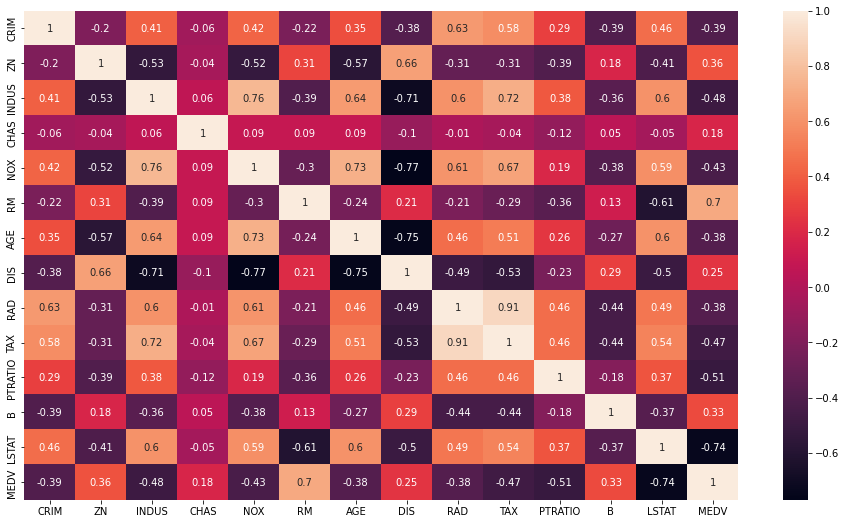

In [498]:
plt.figure(figsize=(16, 9))
# Please use a function of Pandas here.
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot = True)
# Plot a heatmap with Seaborn


### TODO #5: 挑選特徵，並進行說明
- 觀察 heatmap 中具有"顯著"正相關或是"顯著"負相關的特徵
- 把這些特徵進行 concatenation，得到新的 dataframe


1.   為了避免資料分散對模型的負面影響，對所有data做正規化(不包含target'MEDV')。
2.   為了避免多重線性關係，將有較高相關的：
  *   RAD跟TAX
  *   NOX跟INDUS
  *   DIS跟NOX
  *   AGE跟NOX

  刪掉NOX,AGE跟TAX。

3. RM跟LSATA因為與MEDV有強大的相關,所以必定選為feature，而CHAS,DIS與MEDV雖然較無關係，但經實驗結果後發現留著會對精確度有些微的提申，猜測是雖然關係較小但依然會微微影響到MEDV。










In [499]:

# Normalise data points
length = len(df.columns)
for i in range(0, length-1): 
  col = df.iloc[:,i]
  max_val = col.max() 
  min_val = col.min() 
  df.iloc[:,i] = (col-min_val)/(max_val-min_val)
  
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


In [500]:
X = df.drop(columns=['NOX', 'AGE','TAX','MEDV'])
#X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])  not that good
X.head()

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.577505,0.269203,0.000000,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.547998,0.348962,0.043478,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.694386,0.348962,0.043478,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.658555,0.448545,0.086957,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.687105,0.448545,0.086957,0.648936,1.000000,0.099338


### TODO #6: 呈現特徵分佈，並進行說明
- 把你選取到的"重要特徵"進行subplots，畫出散佈圖 (scatter plots)
- 每一張圖的X軸是你選到的特徵、Y軸是房價('MEDV')

由圖可看出，RM跟LSATA因為與MEDV有強大的相關，跟上面的heap圖完全相符。

其他特徵雖然相關較低，但是仍有些微影響(實驗結果也證明)。

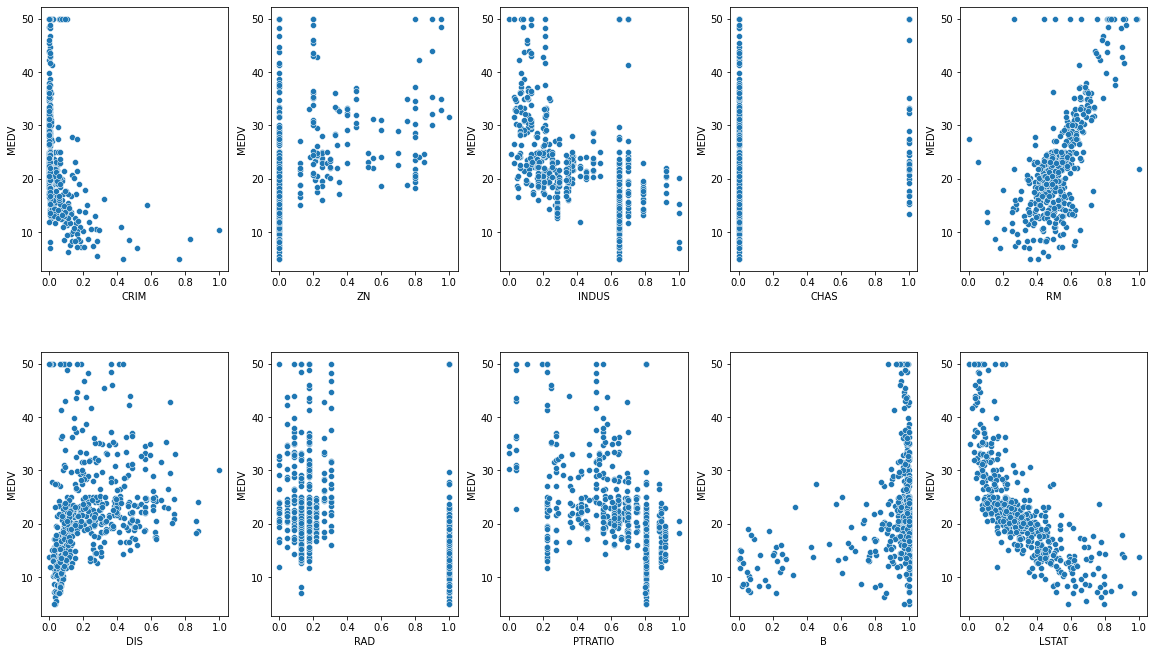

In [501]:
# Please plot subplots here
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(16, 9))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.scatterplot(x=X[k],y=df['MEDV'], ax=axs[index])
    index += 1   

# 繪製圖表ㄒ
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show() 

## 訓練模型前的準備
### TODO #7: 切分資料
- 利用 train_test_split，將資料切成 train set 和 test set
- 設定 train set 的比例為全部資料的 80%
- 請記得設定 random_state 以控制隨機過程

In [502]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

Y = df['MEDV']
# train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape) 
print(X_test.shape) 
print(Y_train.shape) 
print(Y_test.shape) 

(404, 10)
(102, 10)
(404,)
(102,)


## 訓練模型並進行評估

### TODO #8: 訓練 Linear Regression 模型，並說明訓練結果
- 利用 scikit-learn，將資料 fit 在 LinearRegression
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

再經過Linear Regression模型訓練後，丟入X_test並與Y_test計算r2與MSE，結果如下：


> R2:  0.6999198184190445

> MSE:  23.49443833747518



可以看出其實結果並沒有到非常優秀(相比其他模型)。

而從摺線圖可以更清楚的檢查結果，若Y_pred與Y_test的越近則表示模型效果越佳。

而圖中的藍線則是表示Y_pred=Y_test的輔助線，藍點越接近輔助線代表模型越佳。

而由下圖可看出，其實結果大致符合真實情況，不過藍點較散，還需再改進。

In [519]:
# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)
print('R2: ', reg.score(X_test, Y_test))
print('MSE: ', mean_squared_error(Y_test,Y_pred))

R2:  0.6999198184190445
MSE:  23.49443833747518


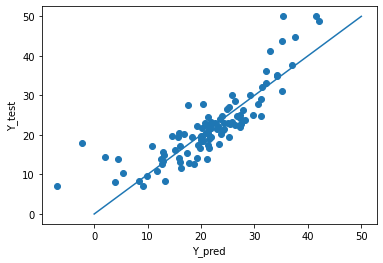

In [504]:
# plotting the y_test vs y_pred
x2 = np.linspace(0,50,10)
y2 = x2
plt.scatter(Y_pred, Y_test)
plt.plot(x2,y2)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

### TODO #9: 訓練 Random Forest Regressor 模型
- 利用 scikit-learn，將資料 fit 在 RandomForestRegressor 模型
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

In [505]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [506]:
# Modeling

rt = RandomForestRegressor(max_depth=27, max_features=5)
rt.fit(X_train,Y_train)
pred=rt.predict(X_test)

print('R2: ',r2_score(Y_test,pred))
print('MSE: ',mean_squared_error(Y_test,pred))

R2:  0.874288241536102
MSE:  9.842459911764704


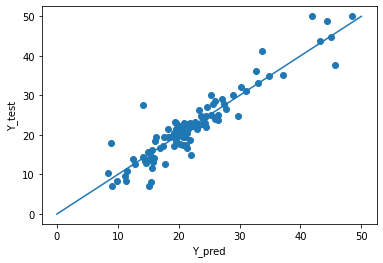

In [507]:
# plotting the y_test vs y_pred
plt.scatter(pred, Y_test)
plt.plot(x2,y2)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

### TODO #10: 參數調整，並進行說明
- 請嘗試使用 Grid search 來進行調參
    - 可以自己寫 for-loop
    - 或是使用 sklearn.model_selection 中的 GridSearchCV 函式

同樣是經過Random Forest Regressor模型訓練後，上一部分參數是依照經驗判斷，而這部分是利用GridSearch的方式比較多組參數組合，並用r2作為scoring去找到最好的模型參數。



*   原本選擇：max_depth=27, max_features=5，結果如下：



>   *   R2:  0.874288241536102
>   *   MSE:  9.842459911764704




*   利用GridSearch再多組參數都去嘗試後選擇了：max_depth=13, max_features=4，結果如下：




>   *   R2:  0.8763805086079764
>   *   MSE:  9.678648228344938


可以看出結果，再比較多組參數後，選擇最好的參數使得結果有些微的上升。


而從摺線圖可以更清楚的檢查結果，若Y_pred與Y_test的越近則表示模型效果越佳。

而圖中的藍線則是表示Y_pred=Y_test的輔助線，藍點越接近輔助線代表模型越佳。

而由下圖可看出，其實結果相將較於剛剛的Linear Regression更符合接近藍線，是更好的模型，這也與數據上的結論相符。

In [508]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [509]:
rt2=RandomForestRegressor()
param=dict(max_depth=[10,11,12,13,14,15,19,20,25,26,27,28,29,30],
          max_features=[1,2,3,4,5,6,7,8,9,10])

grid=GridSearchCV(estimator=rt2,param_grid=param,n_jobs=-1,scoring='r2')
grid.fit(X_train,Y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.8687779993551793
RandomForestRegressor(max_depth=13, max_features=4)


In [510]:
pred2=grid.predict(X_test)

print('R2: ',r2_score(Y_test,pred2))
print('MSE: ',mean_squared_error(Y_test,pred2))

R2:  0.8763805086079764
MSE:  9.678648228344938


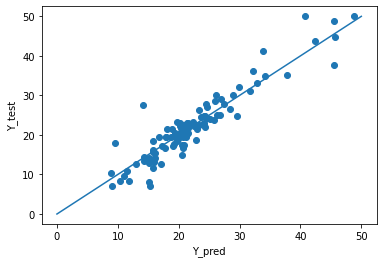

In [511]:
# plotting the y_test vs y_pred
plt.scatter(pred2, Y_test)
plt.plot(x2,y2)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

### TODO #11: 訓練 其他的 regression 模型，與上述兩種模型比較並說明訓練結果
- 將資料 fit 在其他的迴歸模型，可選擇 SVR、XGBRegressor 或其他...
- 利用 TODO #10 的工具來進行參數調整
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

額外模型選擇了SVR，同樣利用GridSearch的方式去找最佳的參數，並用r2作為scoring去找到最好的模型參數。

比較三個模型之結果：



*   Linear Regression


> *     R2:  0.6999198184190445
> *   MSE:  23.49443833747518


*   Random Forest Regressor(max_depth=13, max_features=4)

> *     R2:  0.8763805086079764
> *   MSE:  9.678648228344938


*   SVR(C=1000, gamma=1)

> *     R2:   0.8701854033289664
> *   MSE:  10.163686987669333

R2越接近1越優，而MSE越小則越好，可以看出Random Forest Regressor(max_depth=13, max_features=4)有最好的效果，SVR(C=1000, gamma=1)其次，Linear Regression最差。


而從摺線圖可以更清楚的檢查結果，若Y_pred與Y_test的越近則表示模型效果越佳。

而圖中的藍線則是表示Y_pred=Y_test的輔助線，藍點越接近輔助線代表模型越佳。

而由每個模型的圖也能用視覺化的方式比較出三者差距。





In [512]:
from sklearn.svm import SVR

In [513]:
svr = SVR(kernel="rbf")
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000,10000],'gamma':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(svr,param_grid=param_grid,cv=5,scoring='r2')

grid.fit(X_train,Y_train)
print(grid.best_score_)
print(grid.best_estimator_)

pred3=grid.predict(X_test)
print('R2: ',r2_score(Y_test,pred3))
print('MSE: ',mean_squared_error(Y_test,pred3))

0.8161984749727607
SVR(C=1000, gamma=1)
R2:  0.8701854033289664
MSE:  10.163686987669333


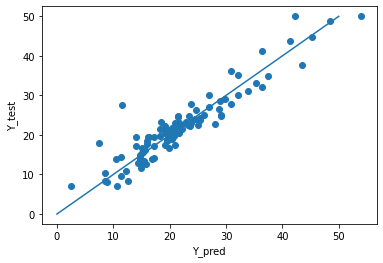

In [514]:
# plotting the y_test vs y_pred
plt.scatter(pred3, Y_test)
plt.plot(x2,y2)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

### (Bonus) TODO #12: 超越助教的分數，並且說明如何做到
- R2:  0.8831229012211493
- Test loss (MSE):  9.150760226336033

In [515]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 122.91886401176453
